In [5]:
from pandas import read_csv
from seaborn import pairplot, heatmap
from matplotlib import pyplot as plt

In [6]:
data = read_csv("data/preprocessed_data.csv")

In [7]:
data.head(3)

,Unnamed: 0,trigger_ts_utc,measured_value,ns,machine,errection_location,installation_location,components,sensor_type
0,0,2024-10-31 01:14:50.846157+00:00,30944.000000,5,==0192E0020=C03DR3,NaN,NaN,NaN,DataPublishTrigger
1,1,2024-10-31 12:51:52.139911+00:00,0.004774,5,==0192E0020=C03DR3,++ST000,+AP002,-BF02,ConsumptionWater
2,2,2024-10-31 12:51:52.139911+00:00,3.647569,5,==0192E0020=C03DR3,++ST000,+AZ001,-BF01,ConsumptionWater


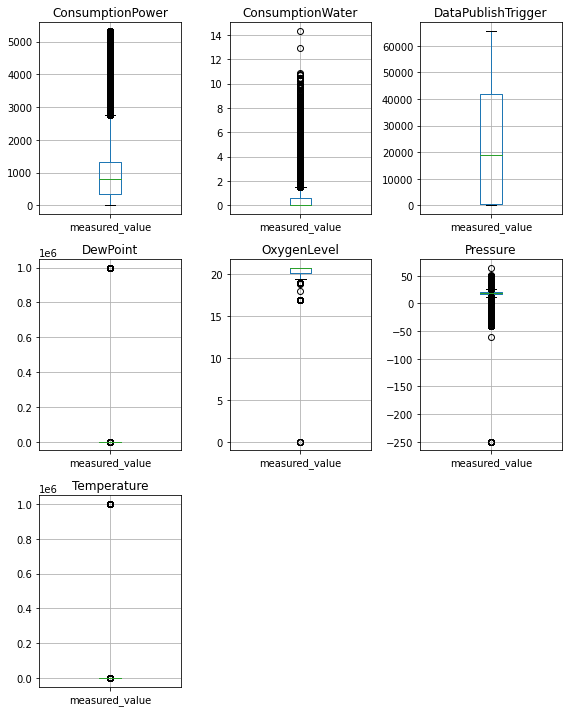

In [8]:
group = data.groupby("sensor_type")
group.boxplot(figsize=(8, 10), column="measured_value", sharey=False, subplots=True)
plt.tight_layout()
plt.show()

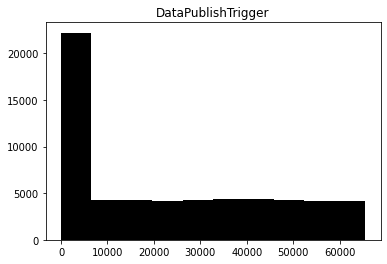

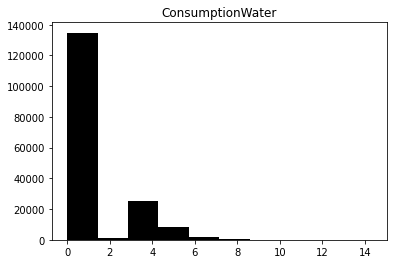

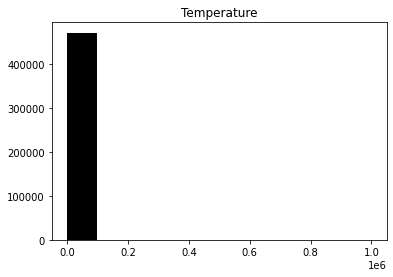

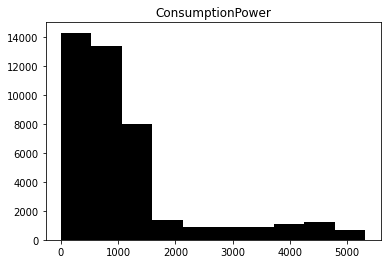

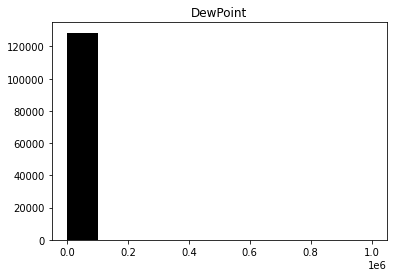

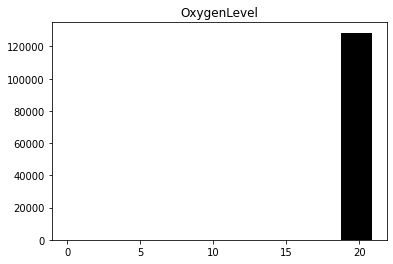

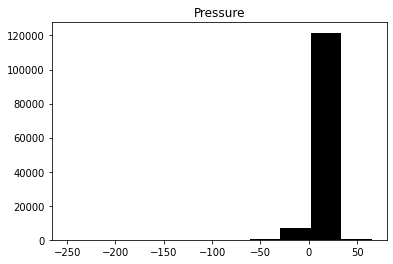

In [9]:
for catetgory in data.sensor_type.unique():
     sub_data = data.loc[data.sensor_type==catetgory]
     sub_data.measured_value.hist(color="k")
     plt.title(catetgory)
     plt.grid(False)
     plt.show()


In [ ]:
for catetgory in data.sensor_type.unique():
     sub_data = data.loc[data.sensor_type==catetgory]
     sub_data.measured_value.hist()
     plt.title(catetgory)
     
     plt.plot(
          data.loc[data.sensor_type=="ConsumptionPower"].trigger_ts_utc,
          data.loc[data.sensor_type=="ConsumptionPower"].measured_value,
          ".-"
     )
     plt.show()
)